Instala as bibliotecas pandas-profiling e download, responsáveis por produzir um relatório dos dados em um dataframe e baixar os dados, respectivamente. 

In [ ]:
!pip install -q --upgrade pandas-profiling download

     |████████████████████████████████| 266kB 2.9MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 3.1MB 8.9MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 604kB 30.1MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 296kB 35.2MB/s 


#Importa as bibliotecas necessárias

In [ ]:
from scipy.io import arff
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from download import download

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import parallel_coordinates
import seaborn as sns
sns.set_style("whitegrid", {"grid.linestyle":"--"})

#Coleta de dados

In [ ]:
file_path = download("https://archive.ics.uci.edu/ml/machine-learning-databases/00379/PhishingData.arff", "PhishingData.arff", kind='file', verbose=False)

file_sizes: 100%|███████████████████████████| 33.6k/33.6k [00:00<00:00, 250kB/s]


In [ ]:
data = arff.loadarff("PhishingData.arff")

In [ ]:
type(data)

tuple

In [ ]:
data[0]

array([(b'1', b'-1', b'1', b'-1', b'-1', b'1', b'1', b'1', b'0', b'0'),
       (b'-1', b'-1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1'),
       (b'1', b'-1', b'0', b'0', b'-1', b'0', b'-1', b'1', b'0', b'1'),
       ...,
       (b'-1', b'0', b'-1', b'-1', b'-1', b'0', b'-1', b'-1', b'0', b'1'),
       (b'0', b'0', b'1', b'0', b'0', b'0', b'-1', b'1', b'0', b'1'),
       (b'1', b'0', b'1', b'1', b'1', b'0', b'-1', b'-1', b'0', b'-1')],
      dtype=[('SFH', 'S2'), ('popUpWidnow', 'S2'), ('SSLfinal_State', 'S2'), ('Request_URL', 'S2'), ('URL_of_Anchor', 'S2'), ('web_traffic', 'S2'), ('URL_Length', 'S2'), ('age_of_domain', 'S2'), ('having_IP_Address', 'S1'), ('Result', 'S2')])

Breve descrição dos atributos. 

In [ ]:
data[1]

Dataset: 'Phishing-weka.filters.supervised.attribute.AttributeSelection-Eweka.attributeSelection.InfoGainAttributeEval-Sweka.attributeSelection.Ranker
	SFH's type is nominal, range is ('1', '-1', '0')
	popUpWidnow's type is nominal, range is ('-1', '0', '1')
	SSLfinal_State's type is nominal, range is ('1', '-1', '0')
	Request_URL's type is nominal, range is ('-1', '0', '1')
	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
	web_traffic's type is nominal, range is ('1', '0', '-1')
	URL_Length's type is nominal, range is ('1', '-1', '0')
	age_of_domain's type is nominal, range is ('1', '-1')
	having_IP_Address's type is nominal, range is ('0', '1')
	Result's type is nominal, range is ('0', '1', '-1')

#Constrói um dataframe

In [ ]:
df_phishing = pd.DataFrame(data[0])

In [ ]:
df_phishing.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'


In [ ]:
df_phishing.dtypes

SFH                  object
popUpWidnow          object
SSLfinal_State       object
Request_URL          object
URL_of_Anchor        object
web_traffic          object
URL_Length           object
age_of_domain        object
having_IP_Address    object
Result               object
dtype: object

Produz um relatório sobre os dados.

In [ ]:
profile = ProfileReport(df_phishing)

In [ ]:
profile.to_notebook_iframe()

Com base neste relatório, é possível observar um número significativo de exemplos duplicados. Contudo, considerando a natureza dos dados analisados, essas instâncias duplicadas são esperadas, pois é possível que múltiplos sites compartilhem dos mesmos valores para os atributos observados. Portanto, neste caso, valores duplicados não são necessariamente um problema. Por isso, os valores duplicados serão mantidos.

#Converte os valores para inteiros

In [ ]:
for col in df_phishing.columns:
  df_phishing[col] = df_phishing[col].apply(int)

In [ ]:
df_phishing.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
df_phishing["Result"].unique()

array([ 0,  1, -1])

#Visualização dos dados

Os gráficos abaixo apresentam a distribuição dos dados analisados.

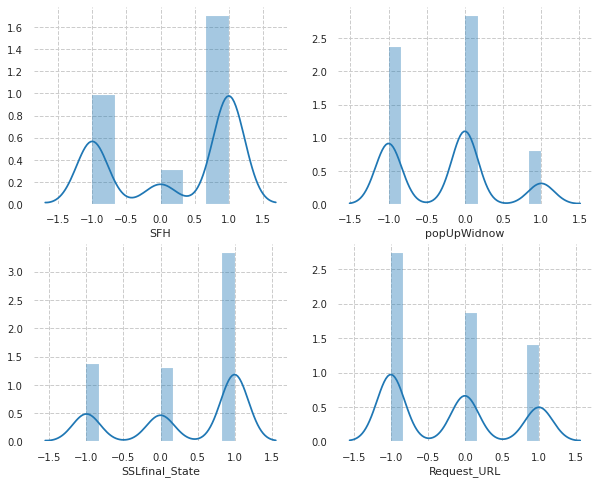

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
sns.distplot(df_phishing.iloc[:,0], ax=ax[0,0])
sns.distplot(df_phishing.iloc[:,1], ax=ax[0,1])
sns.distplot(df_phishing.iloc[:,2], ax=ax[1,0])
sns.distplot(df_phishing.iloc[:,3], ax=ax[1,1])

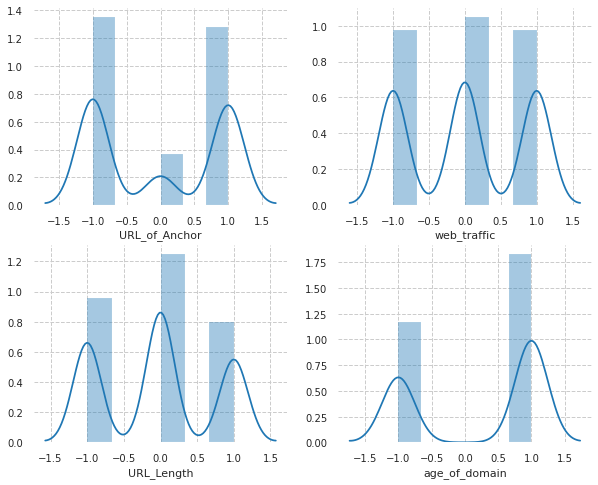

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
sns.distplot(df_phishing.iloc[:,4], ax=ax[0,0])
sns.distplot(df_phishing.iloc[:,5], ax=ax[0,1])
sns.distplot(df_phishing.iloc[:,6], ax=ax[1,0])
sns.distplot(df_phishing.iloc[:,7], ax=ax[1,1])

Como os atributos são categóricos, gerei alguns gráficos, apresentados abaixo, que ilustram a relação entre as features específicas e a variável dependente. Por exemplo, o gráfico a seguir mostra que, quando o atributo 'SFH' tem um valor de -1, mais de 300 exemplos contém a classe igual a 1. Por outro lado, quando o 'SFH' é -1, a maioria dos exemplos contém o valor -1 em 'Result'.

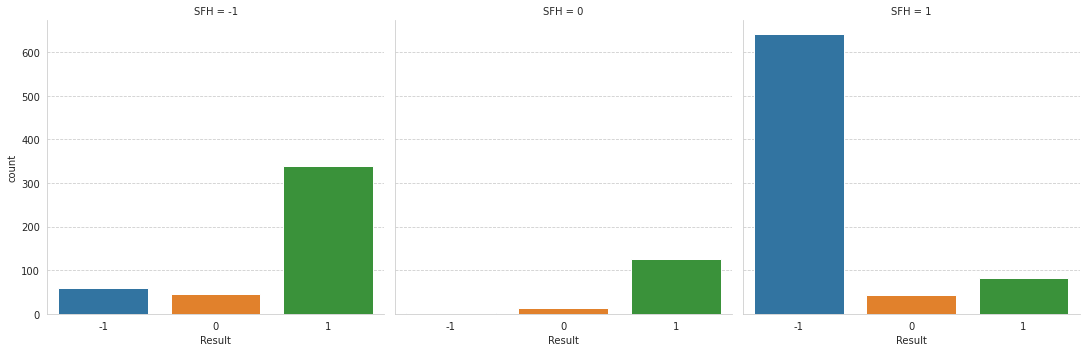

In [ ]:
sns.catplot("Result", col="SFH", kind="count", data=df_phishing)

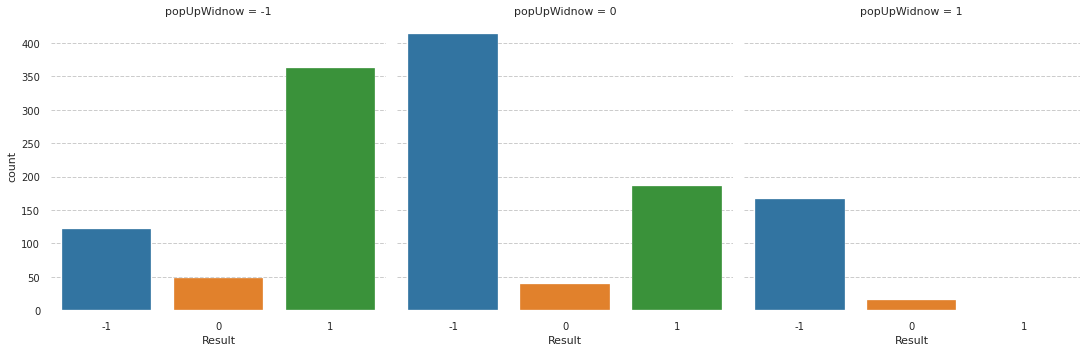

In [ ]:
sns.catplot("Result", col="popUpWidnow", kind="count", data=df_phishing)

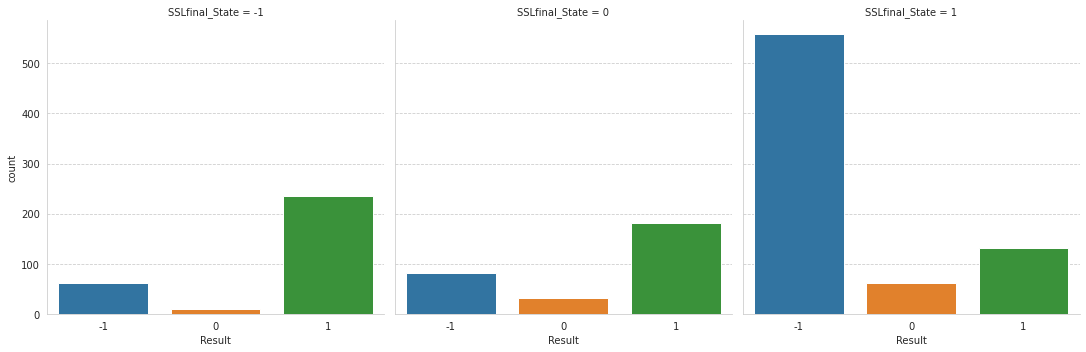

In [ ]:
sns.catplot("Result", col="SSLfinal_State", kind="count", data=df_phishing)

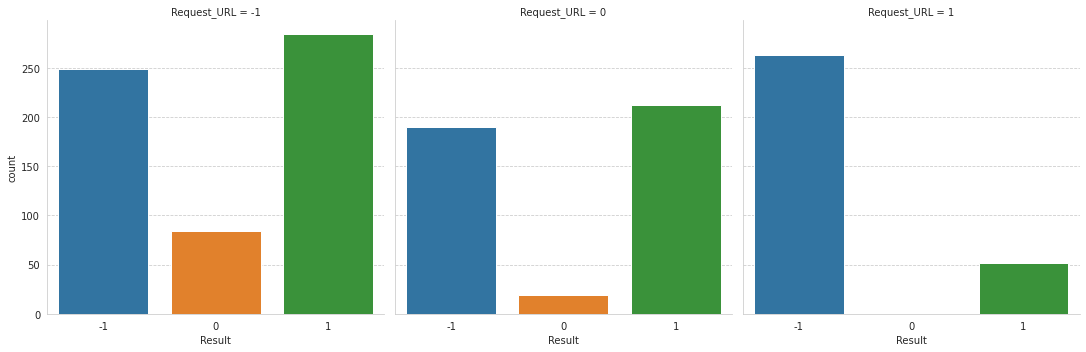

In [ ]:
sns.catplot("Result", col="Request_URL", kind="count", data=df_phishing)

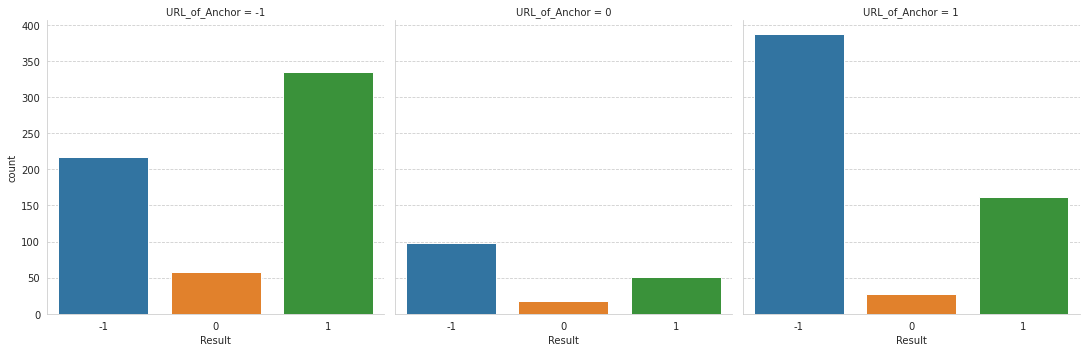

In [ ]:
sns.catplot("Result", col="URL_of_Anchor", kind="count", data=df_phishing)

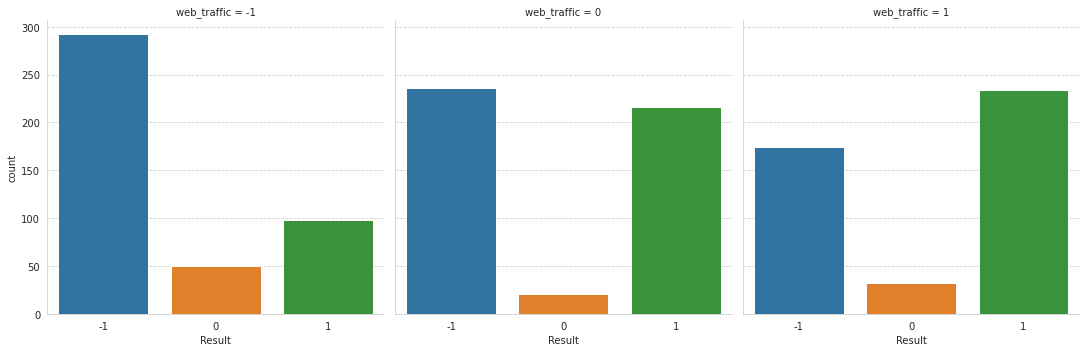

In [ ]:
sns.catplot("Result", col="web_traffic", kind="count", data=df_phishing)

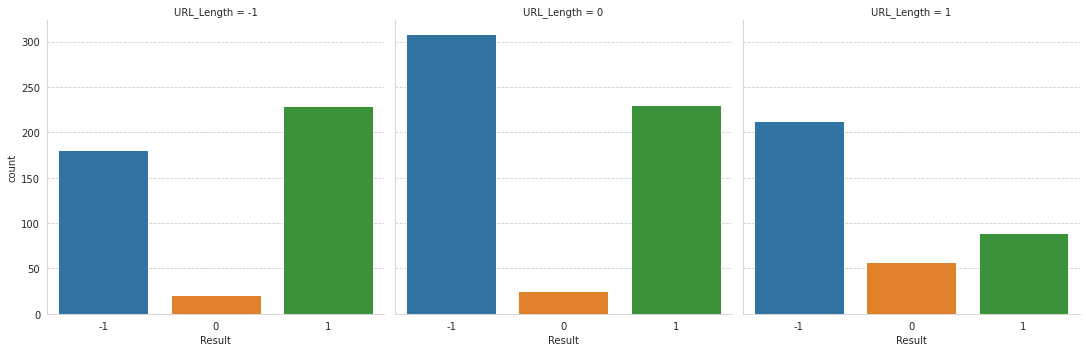

In [ ]:
sns.catplot("Result", col="URL_Length", kind="count", data=df_phishing)

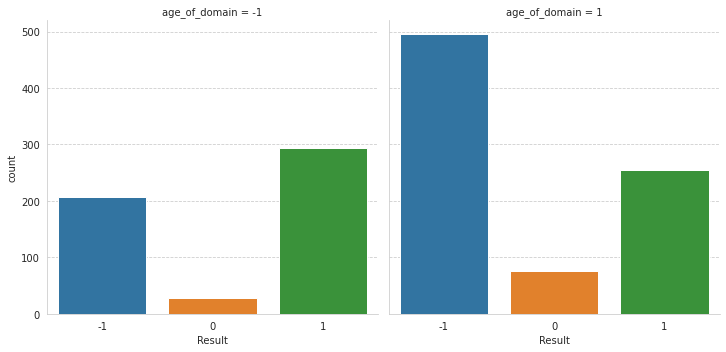

In [ ]:
sns.catplot("Result", col="age_of_domain", kind="count", data=df_phishing)

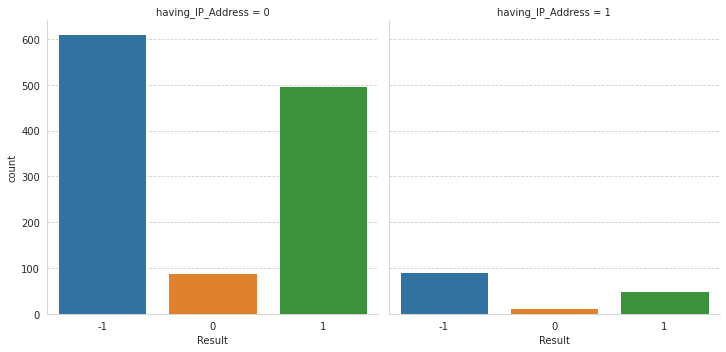

In [ ]:
sns.catplot("Result", col="having_IP_Address", kind="count", data=df_phishing)

#Valores duplicados.

In [ ]:
df_phishing.duplicated().sum()

629

In [ ]:
df_phishing.duplicated().sum()/len(df_phishing)

0.4648928307464893

#Constrói três classificadores

In [ ]:
rfc = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifiers = [rfc, svm, knn]

#Avaliação dos classificadores

In [ ]:
X = df_phishing.drop(["Result"], axis=1).values
y = df_phishing.iloc[:,-1].values

Constrói um dataframe onde será armazenado o desempenho dos classificadores avaliados. 

In [ ]:
df_results = pd.DataFrame()
for clf, clf_name in zip(classifiers, ["Random Forest", "SVM", "k-NN"]):
  clf_results = cross_validate(clf, X, y, cv=10, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])
  df_temp = pd.DataFrame({"metric":list({x:np.mean(clf_results[x]) for x in clf_results}.keys())[2:], "performance":list({x:np.mean(clf_results[x]) for x in clf_results}.values())[2:]})
  df_temp["classifier"] = clf_name
  df_results = pd.concat([df_results,df_temp])
df_results["performance"] = df_results["performance"] * 100

In [ ]:
df_results

,metric,performance,classifier
0,test_accuracy,89.361111,Random Forest
1,test_precision_macro,88.009801,Random Forest
2,test_recall_macro,85.501803,Random Forest
3,test_f1_macro,86.416263,Random Forest
0,test_accuracy,86.700436,SVM
1,test_precision_macro,81.476537,SVM
2,test_recall_macro,70.635564,SVM
3,test_f1_macro,72.631869,SVM
0,test_accuracy,86.918301,k-NN
1,test_precision_macro,82.938376,k-NN


Renomeia as métricas para um formato mais amigável.

In [ ]:
df_results["metric"].replace("test_accuracy", "Accuracy", inplace=True)
df_results["metric"].replace("test_precision_macro", "Precision macro", inplace=True)
df_results["metric"].replace("test_recall_macro", "Recall macro", inplace=True)
df_results["metric"].replace("test_f1_macro", "F1 macro", inplace=True)

#Comparação dos classificadores

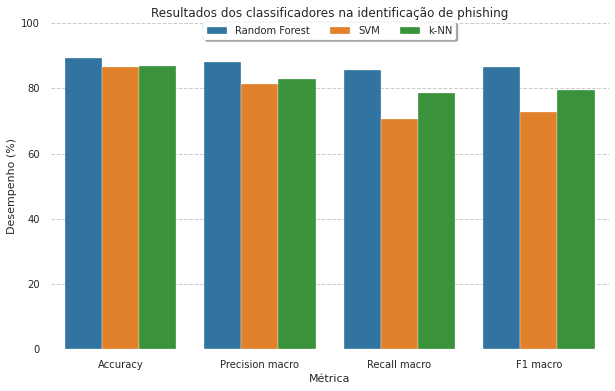

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="metric", y="performance", hue="classifier")
plt.ylabel("Desempenho (%)")
plt.xlabel("Métrica")
plt.title("Resultados dos classificadores na identificação de phishing")
plt.ylim(0,100)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.02), ncol=3, fancybox=True, shadow=True)

#Seleção dos atributos

Produz um gráfico de coordenadas paralelas para ilustrar a relevância dos atributos.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

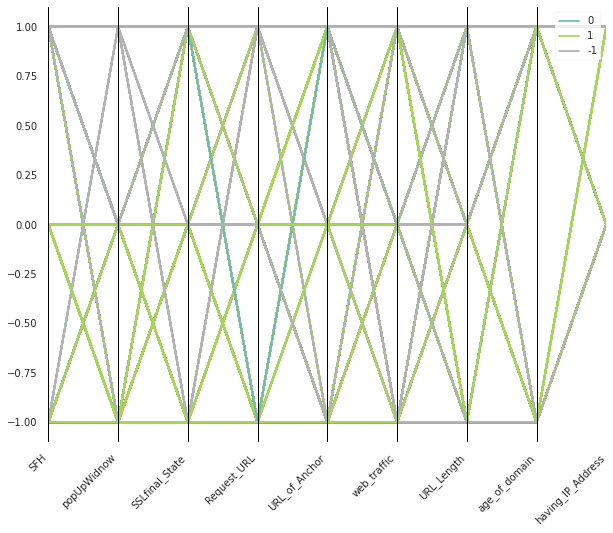

In [ ]:
dataset = df_phishing
plt.figure(figsize=(10,8))
parallel_coordinates(dataset, "Result", colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=45, ha="right")

Infelizmente, o gráfico acima é pouco informativo, pois pouca informação útil pode ser extraída do mesmo. 

#Random Forest Feature importance

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.feature_importances_

array([0.34478458, 0.12816191, 0.15924923, 0.1001472 , 0.09108334,
       0.05477367, 0.08115598, 0.02712097, 0.01352312])

In [ ]:
df_phishing.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [ ]:
df_importance_columns = pd.DataFrame({"Importância":model.feature_importances_*100, "Colunas":df_phishing.columns.values[:-1]})

Text(0.5, 1.0, 'Contribuição de cada atributo para a classificação dos dados')

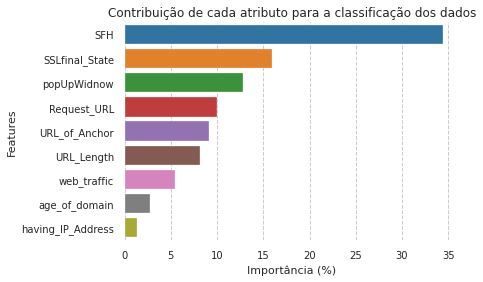

In [ ]:
sns.barplot(data=df_importance_columns.sort_values(by="Importância", ascending=False), x="Importância", y="Colunas")
plt.xlabel("Importância (%)")
plt.ylabel("Features")
plt.title("Contribuição de cada atributo para a classificação dos dados")

O gráfico acima mostra que as 5 primeiras features contribuem com aproximadamente 80% da relevância.

#RFE

O Random Forest contribui bastante para identificar os atributos mais relevantes. Para tornar a seleção dos atributos mais robusta, apliquei um procedimento chamado de "Recursive Feature Elimination (RFE)".

In [ ]:
estimator = RandomForestClassifier()

O RFE exige que seja apontado o número de atributos a serem selecionados. Com base nos resultados do Random Forest, optei por selecionar 5 atributos.

In [ ]:
selector = RFE(estimator=estimator, n_features_to_select=5)

In [ ]:
selector.fit(X, y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

Aponta os atributos selecionados.

In [ ]:
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False])

O RFE gera um rankeamento dos atributos. Quanto mais próximo ao valor 1, melhor. 

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 3, 2, 4, 5])

In [ ]:
columns = df_phishing.columns[:-1]
print("Features mais relevantes: " + str(columns[selector.support_].values))

Features mais relevantes: ['SFH' 'popUpWidnow' 'SSLfinal_State' 'Request_URL' 'URL_of_Anchor']


Os atributos selecionados com o RFE são os mesmos selecionados com o Random Forest. Os resultados desses dois métodos são corroborados pelas correlações apresentadas no relatório disponível no início deste notebook.

#Refaz o estudo com as features selecionadas

In [ ]:
rfc = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_selected = df_phishing[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'URL_Length']]
y_selected = df_phishing["Result"]

In [ ]:
df_selected_results = pd.DataFrame()
for clf, clf_name in zip(classifiers, ["Random Forest", "SVM", "k-NN"]):
  clf_selected_results = cross_validate(clf, X_selected, y_selected, cv=10, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])
  df_temp = pd.DataFrame({"metric_selected":list({x:np.mean(clf_selected_results[x]) for x in clf_selected_results}.keys())[2:], "performance_selected":list({x:np.mean(clf_selected_results[x]) for x in clf_selected_results}.values())[2:]})
  df_temp["classifier_selected"] = clf_name
  df_selected_results = pd.concat([df_selected_results,df_temp])
df_selected_results["performance_selected"] = df_selected_results["performance_selected"] * 100

In [ ]:
df_selected_results

,metric_selected,performance_selected,classifier_selected
0,test_accuracy,89.729847,Random Forest
1,test_precision_macro,87.731008,Random Forest
2,test_recall_macro,86.017406,Random Forest
3,test_f1_macro,86.611771,Random Forest
0,test_accuracy,88.770153,SVM
1,test_precision_macro,84.903835,SVM
2,test_recall_macro,78.080709,SVM
3,test_f1_macro,80.395425,SVM
0,test_accuracy,89.285948,k-NN
1,test_precision_macro,84.999500,k-NN


In [ ]:
df_selected_results["metric_selected"].replace("test_accuracy", "Accuracy", inplace=True)
df_selected_results["metric_selected"].replace("test_precision_macro", "Precision macro", inplace=True)
df_selected_results["metric_selected"].replace("test_recall_macro", "Recall macro", inplace=True)
df_selected_results["metric_selected"].replace("test_f1_macro", "F1 macro", inplace=True)

#Compara os classificadores

Apresenta uma comparação entre o desempenho considerando todos os atributos (performance) e o desempenho nas features selecionadas (performance_selected).

In [ ]:
df_results_compared = pd.concat([df_results, df_selected_results], axis=1)
df_results_compared.drop(['metric_selected', 'classifier_selected'], axis=1)

,metric,performance,classifier,performance_selected
0,Accuracy,89.361111,Random Forest,89.729847
1,Precision macro,88.009801,Random Forest,87.731008
2,Recall macro,85.501803,Random Forest,86.017406
3,F1 macro,86.416263,Random Forest,86.611771
0,Accuracy,86.700436,SVM,88.770153
1,Precision macro,81.476537,SVM,84.903835
2,Recall macro,70.635564,SVM,78.080709
3,F1 macro,72.631869,SVM,80.395425
0,Accuracy,86.918301,k-NN,89.285948
1,Precision macro,82.938376,k-NN,84.999500


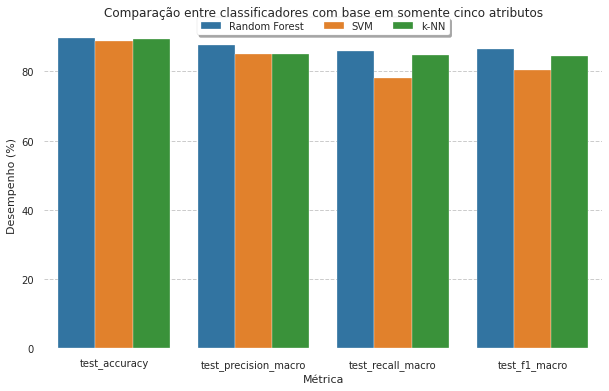

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_selected_results, x="metric_selected", y="performance_selected", hue="classifier_selected")
plt.ylabel("Desempenho (%)")
plt.xlabel("Métrica")
plt.title("Comparação entre classificadores com base em somente cinco atributos")
plt.legend(loc="upper center", bbox_to_anchor=(0.5,1.03), ncol=3, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Atributos selecionados')

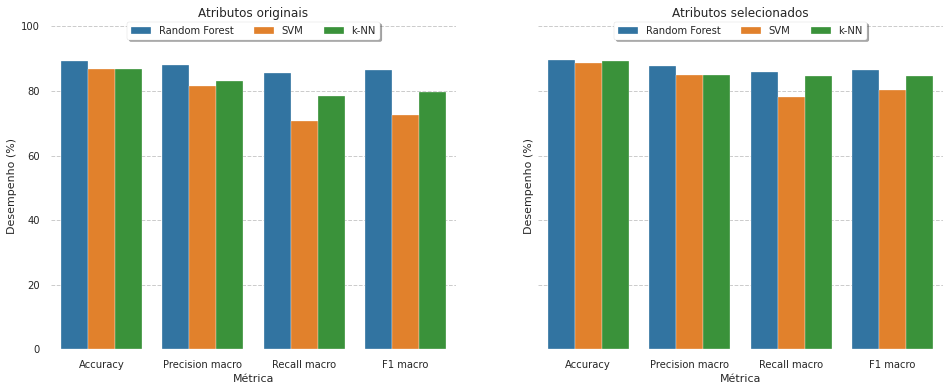

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6), sharey=True)
sns.barplot(data=df_results, x="metric", y="performance", hue="classifier", ax=ax1)
sns.barplot(data=df_selected_results, x="metric_selected", y="performance_selected", hue="classifier_selected", ax=ax2)
for ax in [ax1, ax2]:
  ax.set(ylabel="Desempenho (%)", xlabel="Métrica", ylim=(0,101))
  ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.02), ncol=3, fancybox=True, shadow=True)
ax1.set_title("Atributos originais")
ax2.set_title("Atributos selecionados")


#Considerações finais

Uma série de análises foi conduzida para investigar os dados. Três classificadores foram testados em todos os atributos. Posteriormente, os atributos mais importantes foram selecionados. Em seguida, os mesmos classificadores foram avaliados com os atributos selecionados. Por fim, foi realizada uma comparação entre o desempenho dos classificadores com as features originais e selecionadas. Vale notar que o número de atributos foi selecionado empiricamente. Foram testados 4, 5 e 6 atributos.

Com base nos resultados obtidos, os classificadores alcançaram um desempenho superior quando somente seis atributos foram utilizados. Dessa forma, é possível conseguir um desempenho melhor com menos features, o que economiza recursos computacionais e tempo.
